# Decision tree

## Data from Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

PATH = '/content/gdrive/MyDrive/Creditcard_data/creditcard.csv';

Mounted at /content/gdrive


## Credit card data

In [2]:
import pandas as pd

creditcard_df = pd.read_csv(PATH)
creditcard_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
creditcard_df.shape

(284807, 31)

## Class-imbalance - fraud transactions

In [4]:
creditcard_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Test Training Dataset

In [5]:
from sklearn.model_selection import train_test_split

X = creditcard_df.drop(['Class'],axis=1)
y = creditcard_df.Class

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.33)

print("train rows: {}, test rows: {}".format(X_train.shape[0], X_test.shape[0]))  # rows

train rows: 190820, test rows: 93987


## Decision tree classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

dt.score(X_test, y_test)

0.9991700979922755

## Confusion matrix

In [7]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred, labels=[1,0])

array([[  123,    39],
       [   39, 93786]])

In [8]:
from sklearn.metrics import accuracy_score


tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 99.92%
sensitivity = 75.93%
specificity = 99.96%



# Define Functions for further research

In [9]:
from dataclasses import dataclass

@dataclass
class StatistictsData:
    name: str
    accuracy: float
    sensitivity: float
    specificity: float

def calculate_statistics(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp) * 100
    sensitivity = tp / (tp + fn) * 100
    accuracy = accuracy_score(y_test, y_pred) * 100

    return accuracy, sensitivity, specificity

In [10]:
def run_decisiontree(X_train, X_test, y_train, **estimator_params):
    dt = DecisionTreeClassifier(random_state=0, **estimator_params)
    y_pred = dt.fit(X_train,y_train).fit(X_train, y_train).predict(X_test)
    return y_pred

In [11]:
def decisiontree_evaluation(current_range, dt_statistics_list, **dt_params):
    y_pred = run_decisiontree(X_train, X_test, y_train, **dt_params)
    stats = calculate_statistics(y_test, y_pred)
    dt_stats = StatistictsData(current_range, *stats)
    dt_statistics_list.append(dt_stats)

# Changing parameters of decision tree

In [ ]:
statistics_max_depth = [] # 10 20 30 40 50 
statistics_min_samples_split = [] # 2 3 4 5 6 
statistics_min_samples_leaf = [] # 1 2 3 4 5

In [ ]:
common_range = range(1, 6, 1)

for size in common_range:
    # max depth
    decisiontree_evaluation(size, statistics_max_depth, max_depth=size * 10)
    # min samples split
    decisiontree_evaluation(size, statistics_min_samples_split, min_samples_split=size+1)
    # min samples leaf
    decisiontree_evaluation(size, statistics_min_samples_leaf, min_samples_leaf=size)

In [ ]:
statistics_max_depth_df = pd.DataFrame(statistics_max_depth)
statistics_max_depth_df.rename(columns={'name':'max depth of decision tree'}, inplace=True)
statistics_max_depth_df["max depth of decision tree"] *= 10
statistics_min_samples_split_df = pd.DataFrame(statistics_min_samples_split)
statistics_min_samples_split_df.rename(columns={'name':'min number of split samples'}, inplace=True)
statistics_min_samples_split_df["min number of split samples"]
statistics_min_samples_leaf_df = pd.DataFrame(statistics_min_samples_leaf)
statistics_min_samples_leaf_df.rename(columns={'name':'min number of leaf samples'}, inplace=True)
grouped_stats_dfs = [statistics_max_depth_df, statistics_min_samples_split_df, statistics_min_samples_leaf_df]

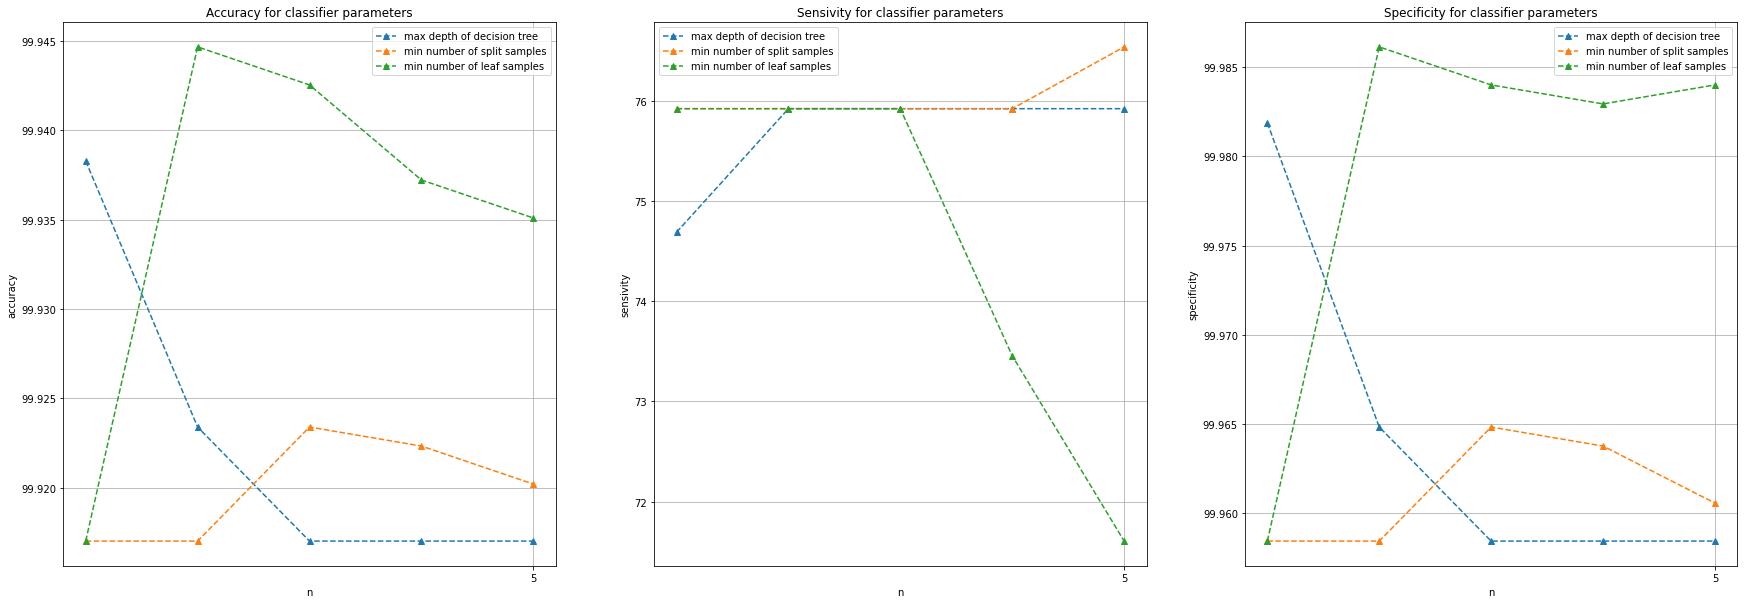

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

plot_style = {"marker": '^', "linestyle": '--'}
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

def plot_grouped_stats(ax, stats, stat_name):
    ax.plot(common_range, stats[0][stat_name], label="max depth of decision tree", **plot_style)
    ax.plot(common_range, stats[1][stat_name], label="min number of split samples", **plot_style)
    ax.plot(common_range, stats[2][stat_name], label="min number of leaf samples", **plot_style)
    ax.grid(b=True)
    ax.legend()

for i,stat_name in enumerate(["accuracy", "sensitivity", "specificity"]):
    plot_grouped_stats(axs[i], grouped_stats_dfs, stat_name)

axs[0].set(xlabel='n', ylabel='accuracy',
        title='Accuracy for classifier parameters')
axs[1].set(xlabel='n', ylabel='sensivity',
        title='Sensivity for classifier parameters')
axs[2].set(xlabel='n', ylabel='specificity',
        title='Specificity for classifier parameters')


loc = plticker.MultipleLocator(base=5.0)
for ax in axs:
    ax.xaxis.set_major_locator(loc)

plt.show()

## Conclusion

Accuracy and specificity are on level 99%.
Sensitivity is the best for max depth between 20 and 40, min number of splits 2 and 4, and min number of leaves between 1 and 4 

# Balancing the training dataset

## Under Sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

sampled_dataset = RandomUnderSampler(random_state=0).fit_resample(X_train, y_train)

X_train_under, y_train_under = sampled_dataset

In [ ]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_under,y_train_under)

y_pred = dt.predict(X_test)

dt.score(X_test, y_test)

0.907859597603924

In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[  145,    17],
       [ 8643, 85182]])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 90.79%
sensitivity = 89.51%
specificity = 90.79%



## Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

sampled_dataset = RandomOverSampler(random_state=0).fit_resample(X_train, y_train)

X_train_over, y_train_over = sampled_dataset

In [ ]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_over,y_train_over)

y_pred = dt.predict(X_test)

dt.score(X_test, y_test)

0.9992445763775841

In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[  122,    40],
       [   31, 93794]])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 99.92%
sensitivity = 75.31%
specificity = 99.97%



## Smote

In [ ]:
from imblearn.over_sampling import  SMOTE

sampled_dataset = SMOTE(random_state=0).fit_resample(X_train, y_train)

X_train_smote, y_train_smote = sampled_dataset

In [ ]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_smote,y_train_smote)

y_pred = dt.predict(X_test)

dt.score(X_test, y_test)

0.9977230893634226

In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[  124,    38],
       [  176, 93649]])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 99.77%
sensitivity = 76.54%
specificity = 99.81%



## Cluster Centroids

In [ ]:
from imblearn.under_sampling import ClusterCentroids

sampled_dataset = ClusterCentroids(random_state=0).fit_resample(X_train, y_train)

X_train_cluster, y_train_cluster = sampled_dataset

In [ ]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_cluster,y_train_cluster)

y_pred = dt.predict(X_test)

dt.score(X_test, y_test)

0.2609084235053784

In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[  159,     3],
       [69462, 24363]])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 26.09%
sensitivity = 98.15%
specificity = 25.97%



## SMOTETomek

In [ ]:
from imblearn.combine import  SMOTETomek

sampled_dataset = SMOTETomek(random_state=0).fit_resample(X_train, y_train)

X_train_smote, y_train_smote = sampled_dataset

In [ ]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_smote,y_train_smote)

y_pred = dt.predict(X_test)

dt.score(X_test, y_test)

0.9979358847500186

In [ ]:
confusion_matrix(y_test, y_pred, labels=[1,0])

array([[  122,    40],
       [  154, 93671]])

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"accuracy = {accuracy:.2f}%\nsensitivity = {sensitivity:.2f}%\nspecificity = {specificity:.2f}%\n")

accuracy = 99.79%
sensitivity = 75.31%
specificity = 99.84%



## Conclusion

For Decision Tree algorithm with Under Sampling for training dataset is the best to improve sensitivity and the model does not lose so much accuracy and specificity.

# Cost-Sensitive Learning

In [ ]:
weights = range(1, 10)
weight_statisticts = [] 

for weight in weights:
    y_pred = run_decisiontree(X_train, X_test, y_train, class_weight={0: 1, 1: weight} )
    stats = calculate_statistics(y_test,y_pred)
    data = StatistictsData(weight,*stats)
    weight_statisticts.append(data)

In [ ]:
weight_statisticts_df = pd.DataFrame(weight_statisticts)
weight_statisticts_df.rename(columns={'name':'Weight of fraudation samples'}, inplace=True)

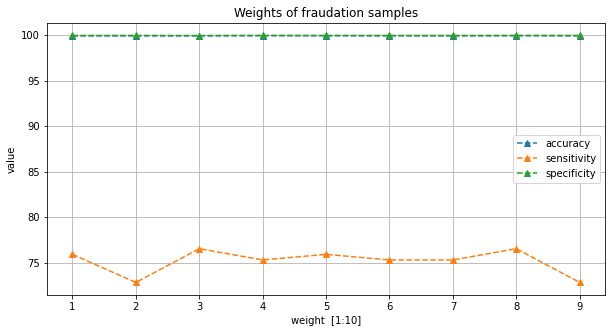

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

plot_style = {"marker": '^', "linestyle": '--'}

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(weights, weight_statisticts_df["accuracy"], label="accuracy", **plot_style)
ax.plot(weights, weight_statisticts_df["sensitivity"], label="sensitivity", **plot_style)
ax.plot(weights, weight_statisticts_df["specificity"], label="specificity", **plot_style)
ax.grid(b=True)
ax.legend()


ax.set(xlabel='weight  [1:10]', ylabel='value',
       title='Weights of fraudation samples')

plt.show()

## Conclusion

For Cost Sensitive Learning sensitivity is too small for further research.

# Ensemble learning

In [12]:
from sklearn.ensemble import AdaBoostClassifier

statistics_adaboost = []

trees_range = range(50, 501, 50)

for n_trees in trees_range:
    ab = AdaBoostClassifier(DecisionTreeClassifier(random_state=0), n_estimators=n_trees, random_state=0)
    y_pred_ab = ab.fit(X_train, y_train).predict(X_test)
    stats = calculate_statistics(y_test, y_pred_ab)
    ab_stats = StatistictsData(n_trees,*stats)
    statistics_adaboost.append(ab_stats)

In [13]:
statistics_adaboost_df = pd.DataFrame(statistics_adaboost)
statistics_adaboost_df.rename(columns={'name':'Number of trees'}, inplace=True)

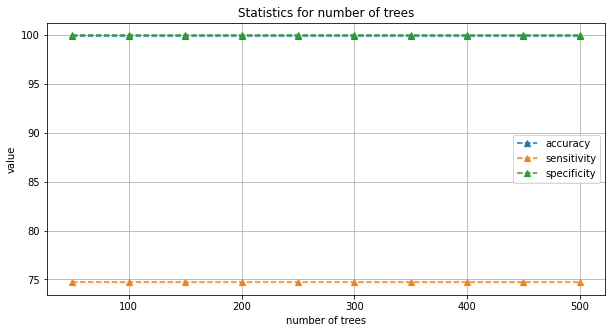

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

plot_style = {"marker": '^', "linestyle": '--'}

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(trees_range, statistics_adaboost_df["accuracy"], label="accuracy", **plot_style)
ax.plot(trees_range, statistics_adaboost_df["sensitivity"], label="sensitivity", **plot_style)
ax.plot(trees_range, statistics_adaboost_df["specificity"], label="specificity", **plot_style)
ax.grid(b=True)
ax.legend()


ax.set(xlabel='number of trees', ylabel='value',
       title='Statistics for number of trees')

plt.show()

## Conclusion

For Ensemble learning sensitivity does not improve.